# PREDIKSI HARGA RUMAH

---

## Section 1 : Datasets and Business Problems

sebelum melakukan analisis mendalam dan menulis kode, kita harus tahu dulu dari data ini, kira kira masalah apa yang bisa di selesaikann, siapa yang bisa pake hasilnya, jawaban jawaban pertanyaan ini akan menjadi pemandu dalam proses teknis, sehingga projek dan pengerjaan lebih terstruktur dan teralur.

### 1.1. WHY?

kenapa prediksi harga rumah penting?

untuk menjawab nya, kita perlu tahu kalo dengan prediksi harga rumah, kita bisa bantu stakeholder (pemangku kepentingan) di sector real estate.

- Bagi Agen Real Estate : Model prodiksi yang akurat bisa dipake untuk alat yang bisa bantu tambahin kepercayaan dan kredibilitas harga properti, artinya harga ditentukan dari data dan fair.

- Bagi Investor Properti : Forecasting Tren pasar, prediksi harga jual yang akurat, model bisa dilatih untuk tahu kapan dan dimana properti bisa naik harganya dari pola yang dibaca, of course perlu data sequential. overall, bantu kasi informasi buat pertimbangan pengambilan keputusan oleh investor.

- Bagi Bank dan Financial Institutions : hipotek (KPR) kredit rumah, pinjaman rumah, nah bank bisa pertimbangin nilai rumah sebagai jaminan. kalau terlalu optimis, bisa rugi besar kalau peminjam gagal bayar dan ternyata harga rumah anjlok, gabisa nutup utang deh.

- Bagi Calon Pembeli dan Penjual Rumah : Model bisa kasi transparansi dan memberikan harga yang make sense, so lebih kredibel lah harganya, ga asal asalan mau nya si developer, tapi berdasarkan perhitungan yang valid.

### 1.2. DATASETS

USA Real Estate Dataset : https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

#### Initialize Project and Package

In [ ]:
# # on terminal

# python3 -m venv mivenv
# source mivenv/bin/activate
# pip install pykernel numpy pandas matplotlib seaborn scikit-learn kagglehub

#### Download Dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmedshahriarsakib/usa-real-estate-dataset")

print("Path to dataset files:", path)

/Users/ryanakmalpasya/Documents/[1] BS/[2] Freelance/[3] PROJECTS/PRETRAINED AND FINE TUNING LLAMA/myenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/ryanakmalpasya/.cache/kagglehub/datasets/ahmedshahriarsakib/usa-real-estate-dataset/versions/25


In [3]:
import os
os.listdir(path)

['realtor-data.zip.csv']

#### Call the Dataset

In [4]:
# import package, dataframe, array type and visuals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# atur style visualisasinya
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# Memuat dataset
"""
Karna Dataset nya besar banget (2jt baris), kita pake 5 persen aja (100k).
dan ini udah cukup untuk menjawab hipotesis awal aja.
"""
try:
    df_full = os.path.join(path, 'realtor-data.zip.csv')
    df_full = pd.read_csv(df_full)
    df = df_full.sample(n=100000, random_state=42)
    print('data lead successfully, good to go bithc')
except FileNotFoundError:
    print(f'File {df_full} not found, donwload again or check it. dumbass')

# tampilin
df.head()

data lead successfully, good to go bithc


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1696936,54239.0,sold,275000.0,1.0,1.0,NaN,1617038.0,Miami,Florida,33156.0,846.0,2022-02-28
2092671,90564.0,sold,399900.0,1.0,1.0,NaN,1497499.0,San Diego,California,92108.0,667.0,2022-04-28
742044,53271.0,for_sale,75000.0,NaN,NaN,2.25,1877529.0,Oceola Township,Michigan,48855.0,NaN,NaN
1424136,12926.0,sold,325000.0,3.0,2.0,0.09,892999.0,Worcester,Massachusetts,1603.0,1409.0,2021-11-29
812329,79221.0,for_sale,169900.0,NaN,NaN,3.70,1998116.0,Holmen,Wisconsin,54636.0,NaN,NaN


In [5]:
# informasi kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1696936 to 1142783
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   brokered_by     99783 non-null   float64
 1   status          100000 non-null  object 
 2   price           99927 non-null   float64
 3   bed             78450 non-null   float64
 4   bath            77053 non-null   float64
 5   acre_lot        85138 non-null   float64
 6   street          99544 non-null   float64
 7   city            99937 non-null   object 
 8   state           100000 non-null  object 
 9   zip_code        99993 non-null   float64
 10  house_size      74457 non-null   float64
 11  prev_sold_date  66988 non-null   object 
dtypes: float64(8), object(4)
memory usage: 9.9+ MB


**Analisis :**

- campuran data object (text) 

- missing value, `bed` = `bath` = `acre_lot` = `house_size` = **20-30% null value**. `prev_sold_date` = **34% null value**

- prev_sold_date seharusnya tipe datanya waktu, bukan object.

#### Kamus Data dan Tinjauan Awal Data

**Tabel 1: Kamus Data**
| Nama Fitur      | Tipe Data   | Deskripsi                                                                 |
|-----------------|-------------|---------------------------------------------------------------------------|
| `price`           | Numerik     | Harga properti dalam Dolar AS. Ini adalah variabel target kita.          |
| `bed`             | Numerik     | Jumlah kamar tidur.                                                      |
| `bath`            | Numerik     | Jumlah kamar mandi.                                                      |
| `acre_lot`        | Numerik     | Luas total lahan dalam satuan acre.                                      |
| `house_size`      | Numerik     | Luas bangunan/area tinggal dalam satuan kaki persegi (square feet).      |
| `status`          | Kategorikal | Status listing properti (misalnya, 'for_sale', 'sold').                  |
| `city`            | Kategorikal | Nama kota tempat properti berada.                                        |
| `state`           | Kategorikal | Nama negara bagian tempat properti berada.                               |
| `zip_code`        | Kategorikal | Kode pos area properti.                                                  |
| `prev_sold_date`  | Tanggal     | Tanggal penjualan properti sebelumnya.                                   |	


salah satu point penting yang harus diperhatikan adalah adanya perbedaan antara fitur `acre_lot` yang memberikan informasi luas tanah secara keseluruhan dan `house_size` yang memberikan informasi luas tanah untuk rumahnya saja. keduanya penting untuk menentukan harga, namun mengukur aspek yang berbeda dari sebuah properti.

selain itu, fitur `status` cukup penting, karena memberikan informasi mengenai status terjual atau tidaknya properti. untuk training model, kita harus memisahkan fitur ini, karena berdasarkan status, harga bisa berbeda, kita mau harga yang aktual untuk training ke model agar tidak bias, sehingga status sold lah yang menentukan harga akhir sebuah properti.

---

## Section 2 : Exploratory Data Analysis (EDA)

pada dasarnya proses EDA dilakukan untuk menguji hipotesis, dan menggunakan data, pendekatan matematis dan statistik, kemudian memvisualisasikannya, dan mengambil kesimpulan apakah hipotesis benar atau selah. kenapa basisnya hipotesis?. karena itu kaya tujuan awal, kita menduga, misal di data ini ada ini, ada hubungan ini, bla bla, kamudian kita buktikan dengan eda.

tapi selain nemuin insihgt, disini kita juga bakal ngelakuin processing and cleaning data. feature engeneering juga bisa, dan juga pahamin data juga bisa. so ga selalu hipotesis, lebih ke pendekatan kita maunya gimna, over all dia bisa handle semua proses sebelum training model, tapi ga selalu harus sama frameworknya.

oke sebelum mulai, kita mau datanya valid, so kita bakal ambil price berdasarkan status sold.

In [6]:
# mengambil data berdasarkan status sold saja
df_sold = df[df['status'] == 'sold'].copy()

print(f'Jumlah data awal : {len(df)}\nJumlah data setelah filter (hanya status - sold) : {len(df_sold)}')

Jumlah data awal : 100000
Jumlah data setelah filter (hanya status - sold) : 36645


**Analisis :**

Meskipun data yang digunakan hanya sepertiga dari total data, tapi data ini tetap cukup relevan dan mewakili kondisi sebenarnya, yang mana sebenarnya harga asli dan valid adalah harga saat status sudah terjual, karena sebelum terjual, bisa saja itu harga yang belum pasti dan masi negotiable. dengan ini artinya, analisis tetap bisa dipercaya dan tidak bias. okey, mari lanjutkan ke proses EDA.

### 2.1. Analisis Dependent Variable (`price`)

*jadi, karena tujuan utama adalah prediksi harga atau variable `price`, langkah pertama yang harus kita lakukan pada eda adalah mengetahui dan memahami bagaimana data target kita distribusi*

**Hipotesis :** Harga properti mungkin akan cenderung condong ke kanan distribusinya, karena biasanya ada beberapa harga rumah yang tinggi banget yang bikin nilai rata rata ketarik ke atas.

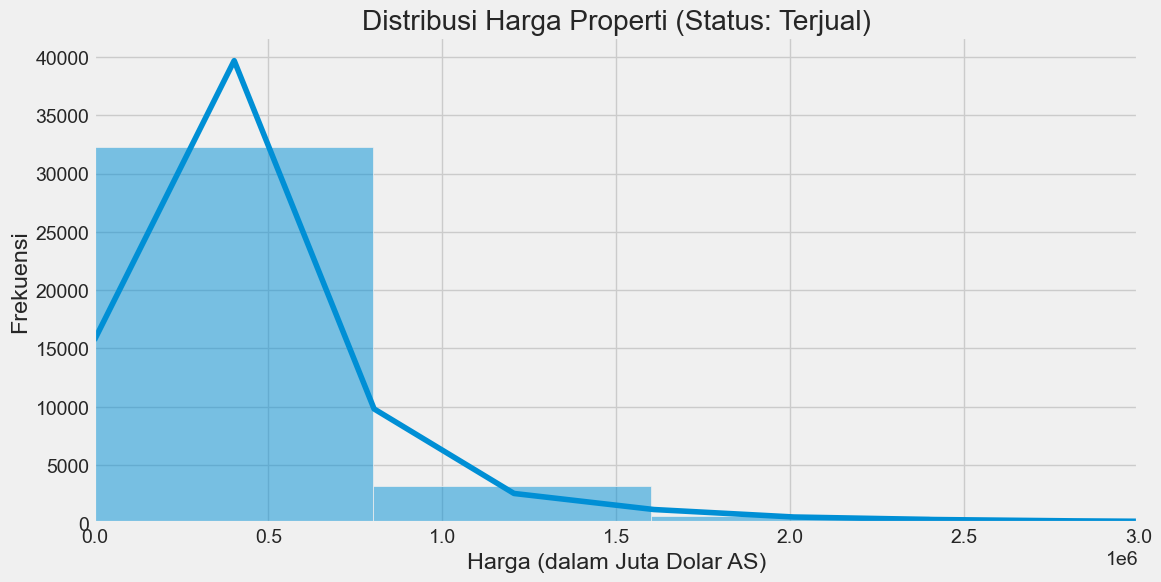

Skewness dari distribusi harga: 33.68
Kurtosis dari distribusi harga: 2564.90


In [7]:
# Visualisasi distribusi harga
figsize = (12,6)
plt.figure(figsize=figsize)
sns.histplot(df_sold['price'], kde=True, bins=100)
plt.title('Distribusi Harga Properti (Status: Terjual)')
plt.xlabel('Harga (dalam Juta Dolar AS)')
plt.ylabel('Frekuensi')

# batas sumbu x untuk handle outlier
plt.xlim(0,3000000)
plt.show()

# hitung skewness dan kurtois
skewness = df_sold['price'].skew()
kurtosis = df_sold['price'].kurt()

print(f"Skewness dari distribusi harga: {skewness:.2f}")
print(f"Kurtosis dari distribusi harga: {kurtosis:.2f}")

**Analisis :**

dari gambar kita bisa liat :
- histogram dengan frekuensi tinggi di rentang harga rendah.
- semakin mahal harganya, semakin sedikit frekuensinya.
- ada ekor panjang ke kanan (right-skewed) yang mana ciri khas dari distribusi condong ke kanan.

data statistik pendukung :
- skewness = 33.7, sangat besar, distribusi sangat tidak simetris dan jelas condong ke kanan.
- kutosis = 2565, ekstrim tinggi, artinya banyak outlier (harga sangat tinggi) yang bikin distribusi jadi ga simetris dan runcing ke kanan.

kesimpulannya :
- hipotesis benar, harga properti cenderung tidak terdistribusi secara merata, dan benar, ada beberapa harga rumah yang terlalu tinggi, outlier, yang bikin data tidak seimbang.
- oleh karena itu, kita perlu scaling dan norm atau transformasi logaritmik sebelum kasi ke model, supaya ga gradient exploding. 
- selain itu, kita gabisa pake mean untuk dapetin nilai reperesentatif data, sehingga kita bisa pake median.

### 2.2. Ukuran porperti adalah pendorong utama harga.

*Secara intuitif, semakin besar dan luas rumah, maka semakin mahal dongg??*

Hipotesis : fitur `house_size` dan `acre_lot` akan punya korelasi positif yang kuat dengan `price`.

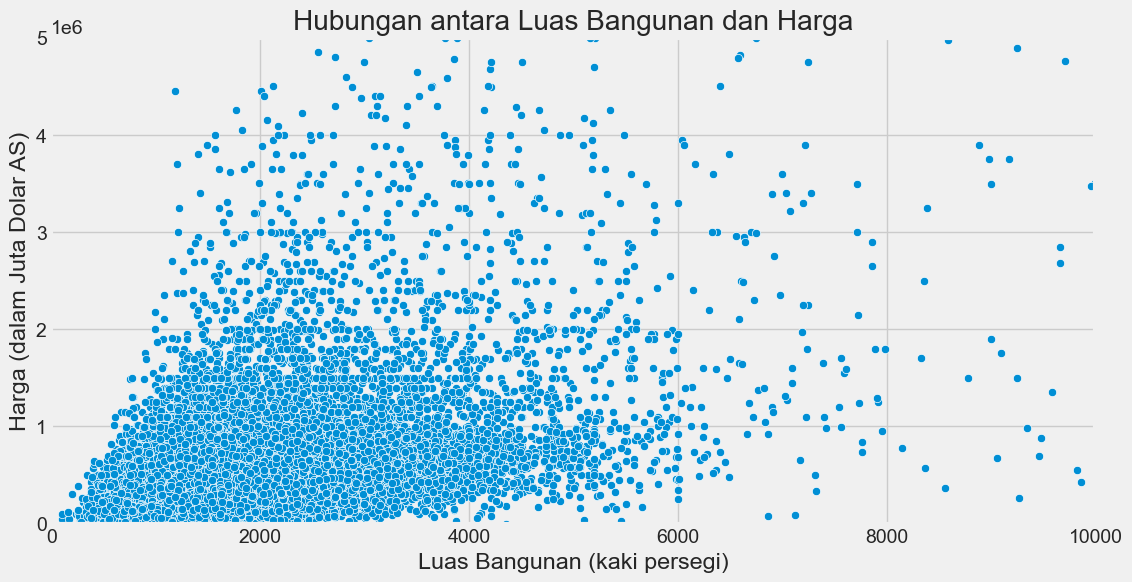

In [8]:
# Scatter plot untuk house_size vs price
plt.figure(figsize=figsize)
sns.scatterplot(data=df_sold, x='house_size', y='price')
plt.title('Hubungan antara Luas Bangunan dan Harga')
plt.xlabel('Luas Bangunan (kaki persegi)')
plt.ylabel('Harga (dalam Juta Dolar AS)')
plt.xlim(0, 10000) # Batasi untuk kejelasan
plt.ylim(0, 5000000) # Batasi untuk kejelasan
plt.show()

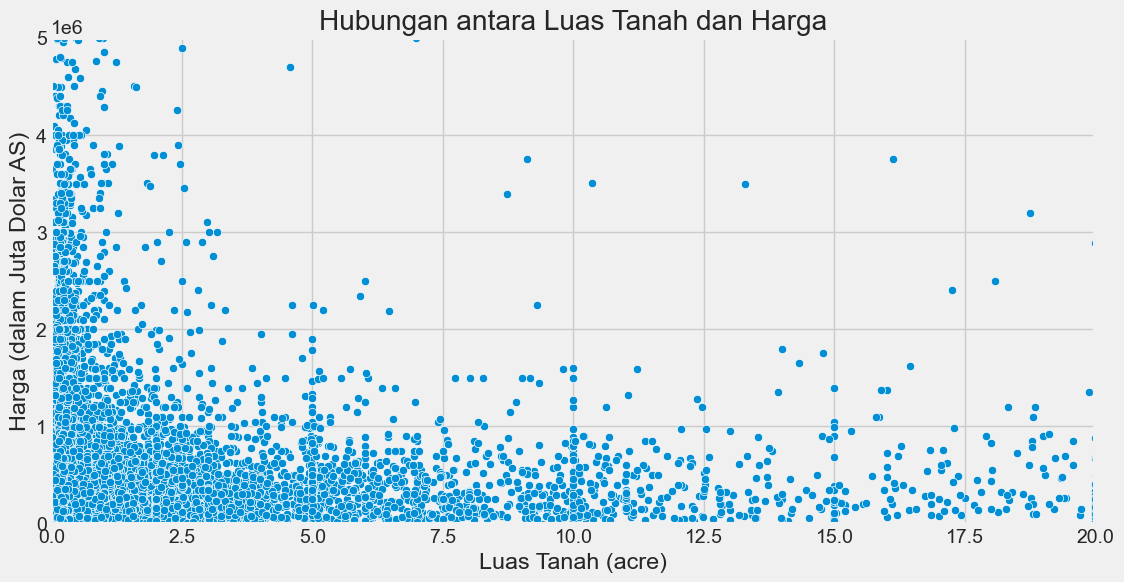

In [9]:
# Scatter plot untuk acre_lot vs price
plt.figure(figsize=figsize)
sns.scatterplot(data=df_sold, x='acre_lot', y='price')
plt.title('Hubungan antara Luas Tanah dan Harga')
plt.xlabel('Luas Tanah (acre)')
plt.ylabel('Harga (dalam Juta Dolar AS)')
plt.xlim(0, 20) # Batasi untuk kejelasan
plt.ylim(0, 5000000) # Batasi untuk kejelasan
plt.show()

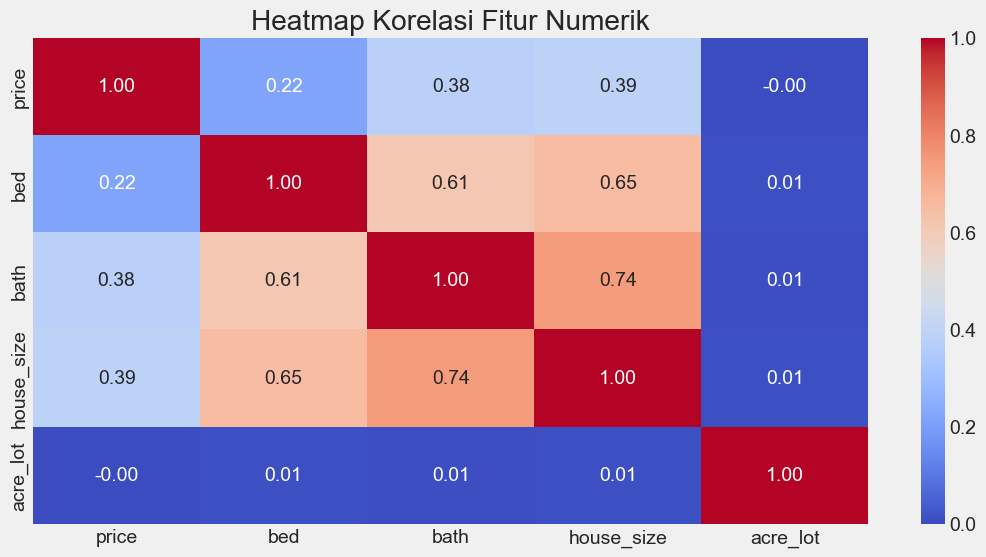

In [10]:
# Heatmap korelasi untuk fitur numerik utama
plt.figure(figsize=figsize)
corr_matrix = df_sold[['price', 'bed', 'bath', 'house_size', 'acre_lot']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

**Analisis :**

Luas Bangunan (`house_size`):
- Scatter Plot nunjukkin tren positif, semakin luas bangunan, semakin cenderung meningkat harganya.
- korelasi 0.39, terbilang moderate untuk cukup mendukung adanya hubungan positif antara luas banguna dengan harganya.
- insight nya mungkin house_size adalah prediktor yang cukup penting untuk harga properti. Namun hubungannya tidak linear, kesimpulannya ini penting, tapi bukan satu satunya faktor.

Luas Tanah (`acre_lot`)
- Sccatter plit tidak mengindikasikan pola yang jelas, banyak juga yang luas tanagnya tinggi tapi harganya tetep rendah.
- korelasi 0.00 menunjukkan hampir tidak ada hubungan antara luas tanah dengan harganya.
- insgiht nya mungkin luas tanah bukan indikator yang kuat di dataset dan kasus ini.

Kesimpulan : 

luas bangunan, mempunyai hubungan positif dengan harga, cukup menentukan, meskipun tidak selalu dan linear. luas tanah, tidak sama sekali pada kasus ini. semua informasi ini membuka hipotesis baru. bisa jadi lokasi yang lebih nentuin.

### 2.3. Lokasi adalah segalanya

*Like old people in real estate says 'location, location, location'. mantra yang cukup populer di kalangan real estate, mari lihat apakah data ini mendukung itu.*

Hipotesis: Akan ada variasi harga yang signifikan antar negara bagian (`state`) dan juga kota (`city`).

In [40]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1497 entries, 1486332 to 1489742
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   brokered_by            1497 non-null   object        
 1   price                  1497 non-null   float64       
 2   bed                    1497 non-null   float64       
 3   bath                   1497 non-null   float64       
 4   acre_lot               1497 non-null   float64       
 5   house_size             1497 non-null   float64       
 6   prev_sold_date         1497 non-null   datetime64[ns]
 7   city_Albany            1497 non-null   bool          
 8   city_Brooklyn          1497 non-null   bool          
 9   city_Buffalo           1497 non-null   bool          
 10  city_Cheektowaga       1497 non-null   bool          
 11  city_Colonie           1497 non-null   bool          
 12  city_Fairport          1497 non-null   bool          
 13 

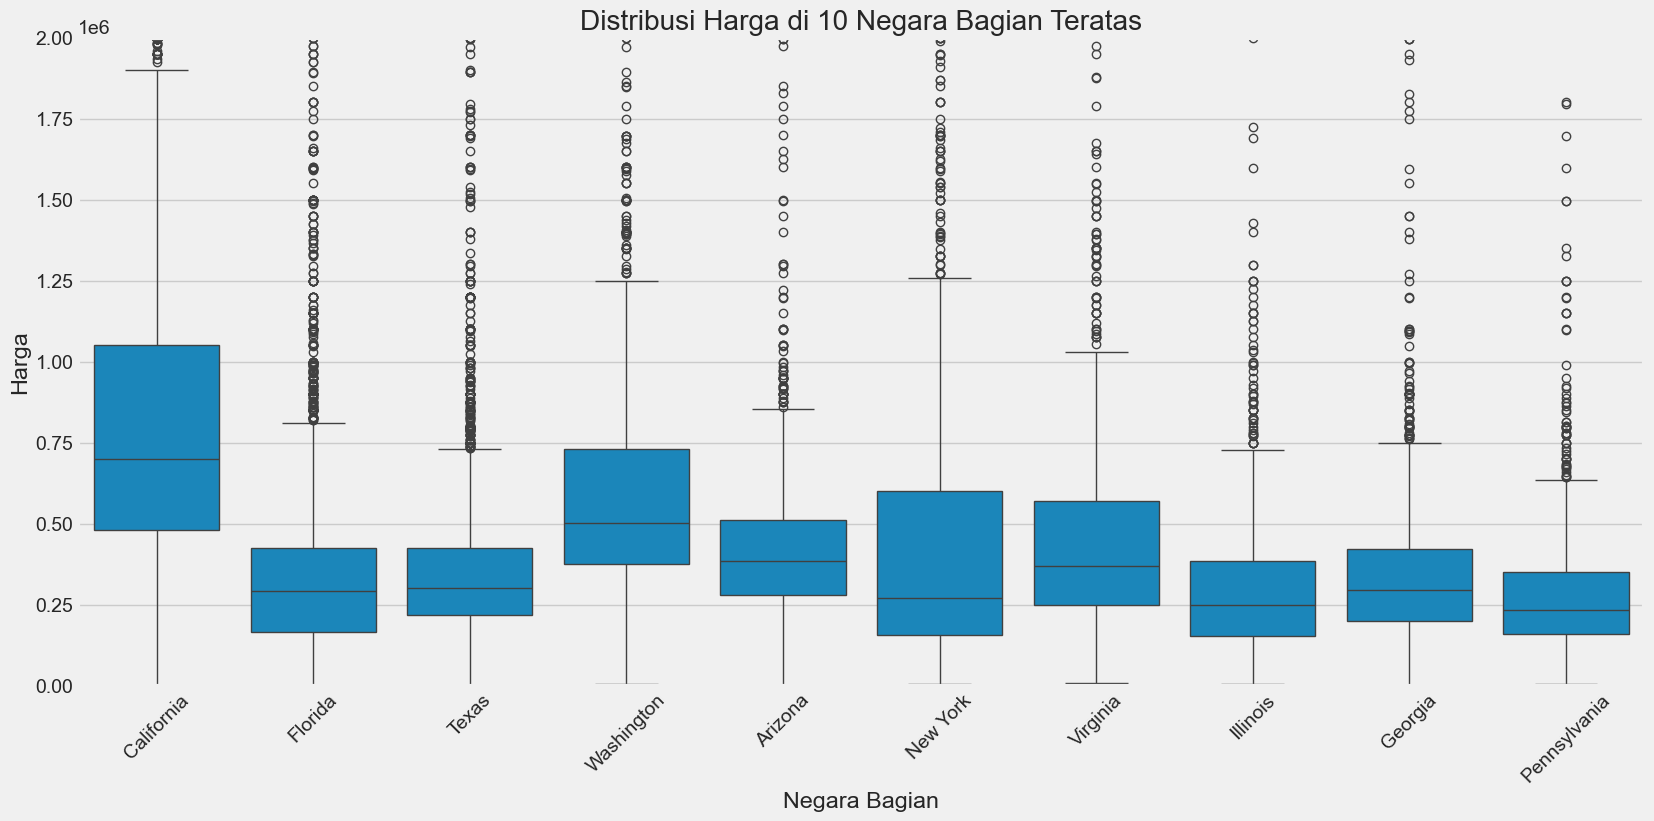

In [11]:
# Boxplot harga berdasarkan negara bagian
# Kita akan fokus pada beberapa negara bagian dengan data terbanyak untuk kejelasan
top_states = df_sold['state'].value_counts().nlargest(10).index
df_top_states = df_sold[df_sold['state'].isin(top_states)]

plt.figure(figsize=(18, 8))
sns.boxplot(data=df_top_states, x='state', y='price', order=top_states)
plt.title('Distribusi Harga di 10 Negara Bagian Teratas')
plt.xlabel('Negara Bagian')
plt.ylabel('Harga')
plt.ylim(0, 2000000) # Batasi untuk melihat distribusi utama
plt.xticks(rotation=45)
plt.show()

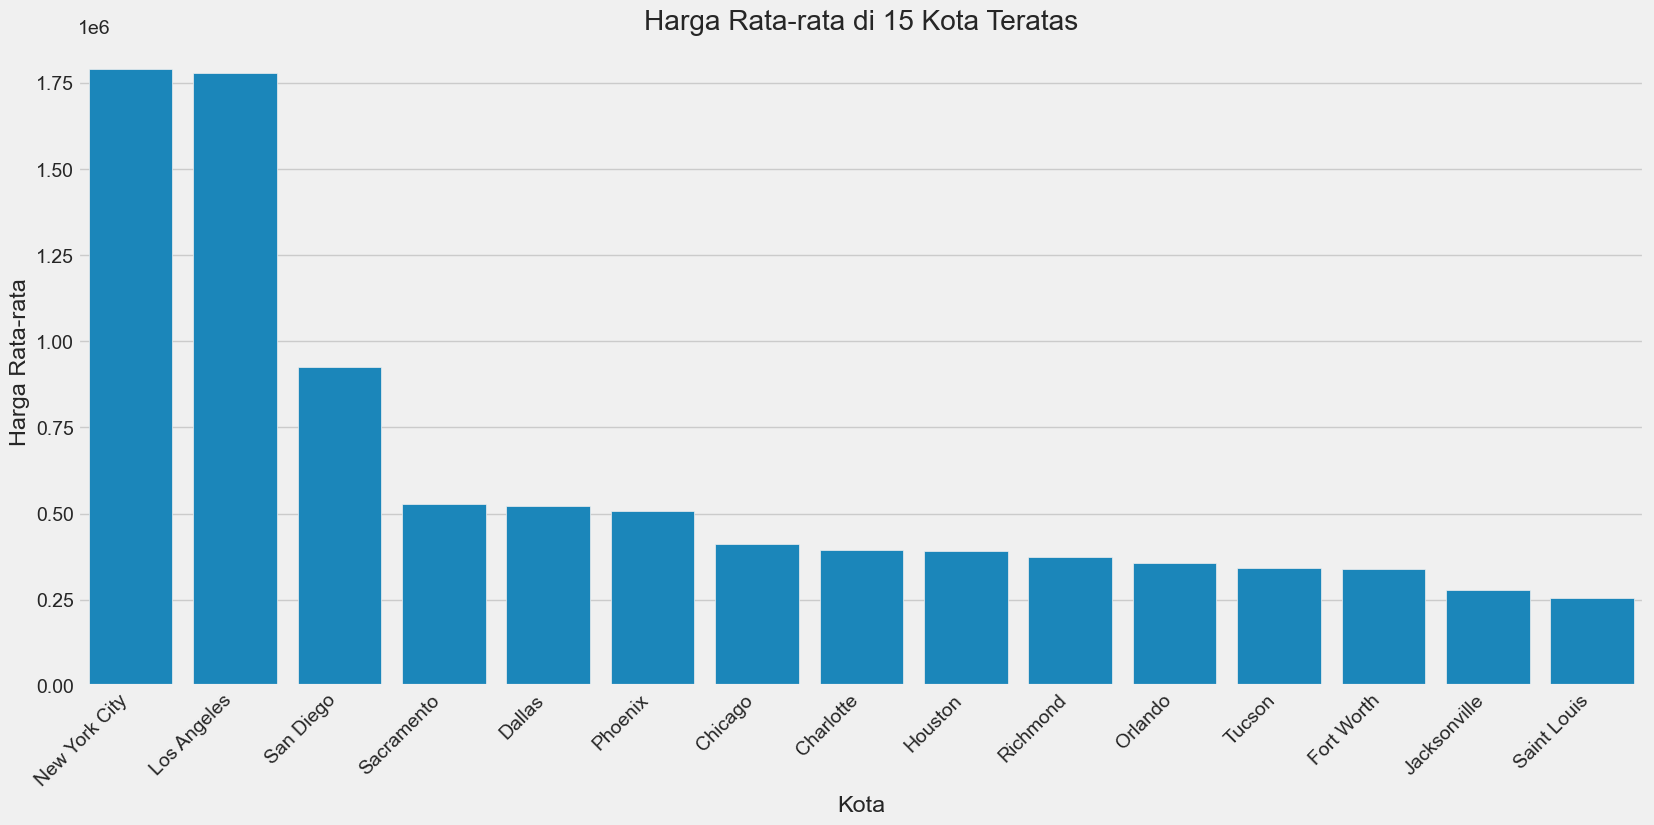

In [12]:
# Bar plot harga rata-rata untuk 15 kota teratas
top_cities = df_sold['city'].value_counts().nlargest(15).index
avg_price_by_city = df_sold[df_sold['city'].isin(top_cities)].groupby('city')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(18, 8))
sns.barplot(x=avg_price_by_city.index, y=avg_price_by_city.values)
plt.title('Harga Rata-rata di 15 Kota Teratas')
plt.xlabel('Kota')
plt.ylabel('Harga Rata-rata')
plt.xticks(rotation=45, ha='right')
plt.show()

**Abalisis :**

Variasi Antar Negara Bagian (`state`) :

- boxplot nunjukkin harga yang sangat bervariasi antar negara bagian di amerika.
- negara bagian seperti california, washington dan new york punya median yang jauh lebih tinggi, dari pada georgia dan pennsylvania.
- Insightnya lokasi geografis (state) punya peran penting dalam menentukan harga dari properti, bisa jadi karena ekonomi lokal dan kepadatan penduduk adalah faktornya.

Variasi Antar Kota (`city`) :

- bar chart, nunjukkin harga bervariasi antar kota
- kota kaya new tork dan los angeles, beh, harga rata rata nih ya, bisa sampe 1.8 jt dolar. jau lebih tinggi dari kota lain.
- bagkan di state yang sama 

aja, beda cities beda rata rata harga property, kaya sandiago dan sacramento di california state.
- insightnya, harga antar kota juga bervariasi, malahan ada beberapa kota yang sangat tinggi.

Kesimpulan :

hipotesis benar, ada variasi harga properti untuk kota dan state, yang menandakan bahwa lokasi memainkan peran penting dalam penentu harga dari rumah. 

tapi ini jadi tantangan juga, kolom ini penting, dan jika ingin dipersiapkan untuk model, harus di encoding dlu, dan hasilnya bisa sampe ratusan  kolom, yang bikin model jadi ga efisien dan sulit di interpretasikan (curse of dimentionality). tapi kalem, kita akan mencari cara yang lebih efisien dan canggih untuk representasiin fitur lokasi ini.

### 2.4. Jumlah kamar meningkatkan harga

*inutitif juga makin banyak kamar makin mahal, tapi.. kalo kita inget konsep dimisishing marginal returns, jika salah satu factor of production dipush secara berlebihan, dampak nya akan stagnan pada point tertentu*.

**Hipotesis  :** Harga akan meningkat seiring penambahan jumlah kamar tidur (`bad`) dan kamar mandi (`bath`), tetapi akan stagnan pada point tingkatan tertentu (efek dmr).

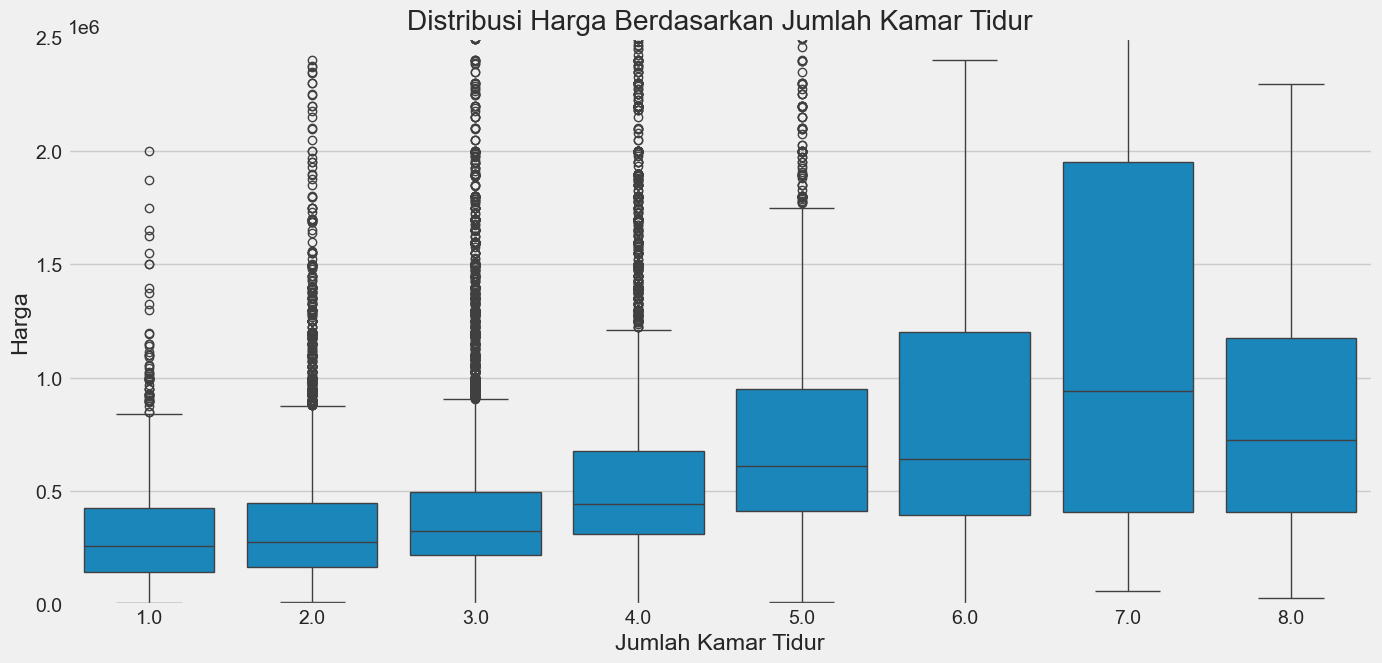

In [13]:
# Boxplot harga berdasarkan jumlah kamar tidur
# Mengabaikan nilai ekstrim untuk visualisasi yang lebih baik
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_sold[(df_sold['bed'] > 0) & (df_sold['bed'] <= 8)], x='bed', y='price')
plt.title('Distribusi Harga Berdasarkan Jumlah Kamar Tidur')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga')
plt.ylim(0, 2500000)
plt.show()

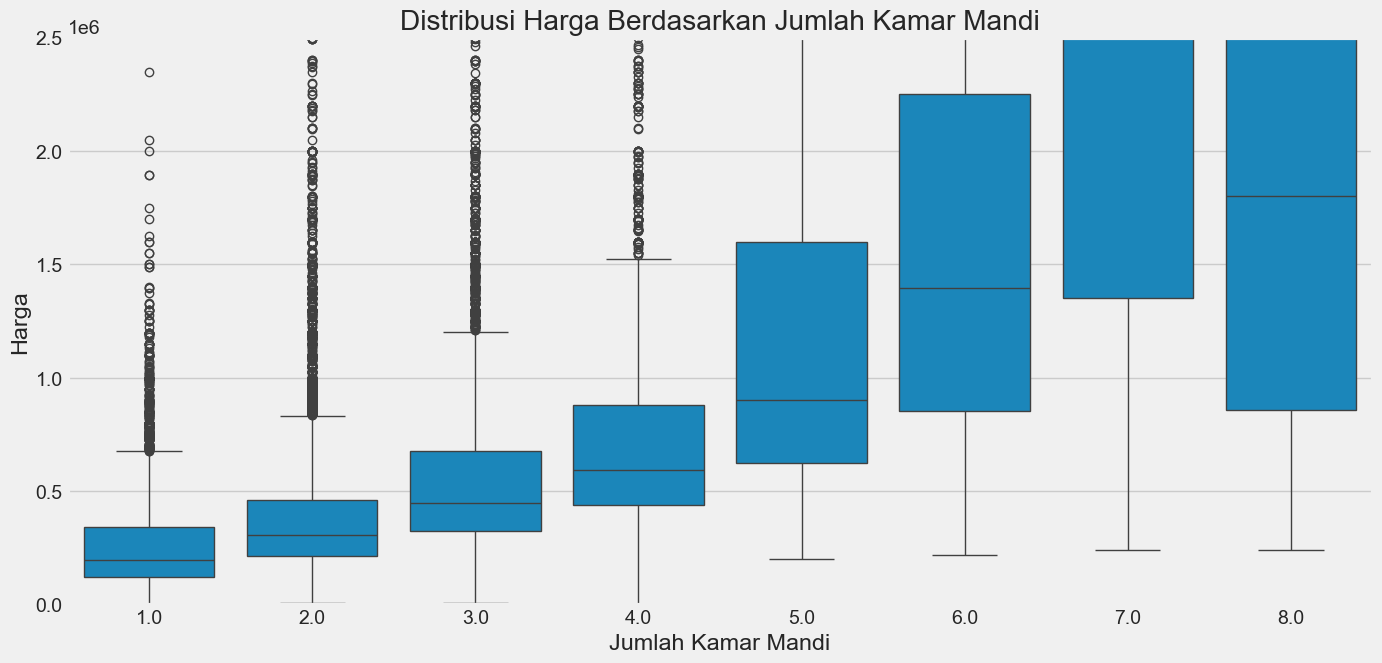

In [14]:
# Boxplot harga berdasarkan jumlah kamar mandi
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_sold[(df_sold['bath'] > 0) & (df_sold['bath'] <= 8)], x='bath', y='price')
plt.title('Distribusi Harga Berdasarkan Jumlah Kamar Mandi')
plt.xlabel('Jumlah Kamar Mandi')
plt.ylabel('Harga')
plt.ylim(0, 2500000)
plt.show()

**Analisis :**

Harga naik seiring kamar bertambah:

median harga terus naik saat jumlah kamar tidur atau kamar mandi meninkat, memvalidasi bahwa banyak vasilitas = properti lebih bernilai di market.

Efek diminishing returns :

kenaikan harga dari 2 -> 3 kamar itu tinggi, tapi dari 5 -> seterusnya kenaikan kecil, artinya, makin banyak kamar, tambahan valuasi properti tidak signifikan lagi.

Semakin banyak kamar semakin tidak past :

tumah besar punya persebaragn harga yang lebih luas, nah artinya harga rumah besar akab lebih susah diprediksi, hal ini karena banyak dipengaruhi faktor lain.


Kesimpulan

Hipotesis awal terbukti: harga meningkat seiring jumlah kamar, namun efek peningkatannya melambat. ffitur jumlah kamar penting, tapi perlu hati hati pas modelling, karena akan ada efek non linaar untuk fitur (jumlah kamar atau kamar mandi) yang lebih banyak.

---

## Section 3 : Cleaning and Preprocessing Data

Di proses data science, dari cari dataset sampe training dan eval, paling susah tuh di proses ini, cleaning dan preprocessing data dari proses eda untuk disiapkan ke model. karena setiap proses ini, harus selalu masuk akal dan membuktikan kevalidasian data.

### 3.1. Missing Values (NaN)

always, *ga semua nilai null itu nilai yang harus di hapus*. sometimes, there is the reason dan malah mungkin itu bisa bantu kasih insight. Soo, untuk hapus kita harus punya strategi khusus untuk handling setiap null value.

In [15]:
print(f"Dimensi awal data: {df_sold.shape[0]} baris, {df_sold.shape[1]} kolom")
print("Nilai null per kolom:")
df_sold.isnull().sum()

Dimensi awal data: 36645 baris, 12 kolom
Nilai null per kolom:


brokered_by        146
status               0
price               14
bed               3174
bath              3544
acre_lot          4960
street              93
city                 4
state                0
zip_code             0
house_size        4737
prev_sold_date       0
dtype: int64

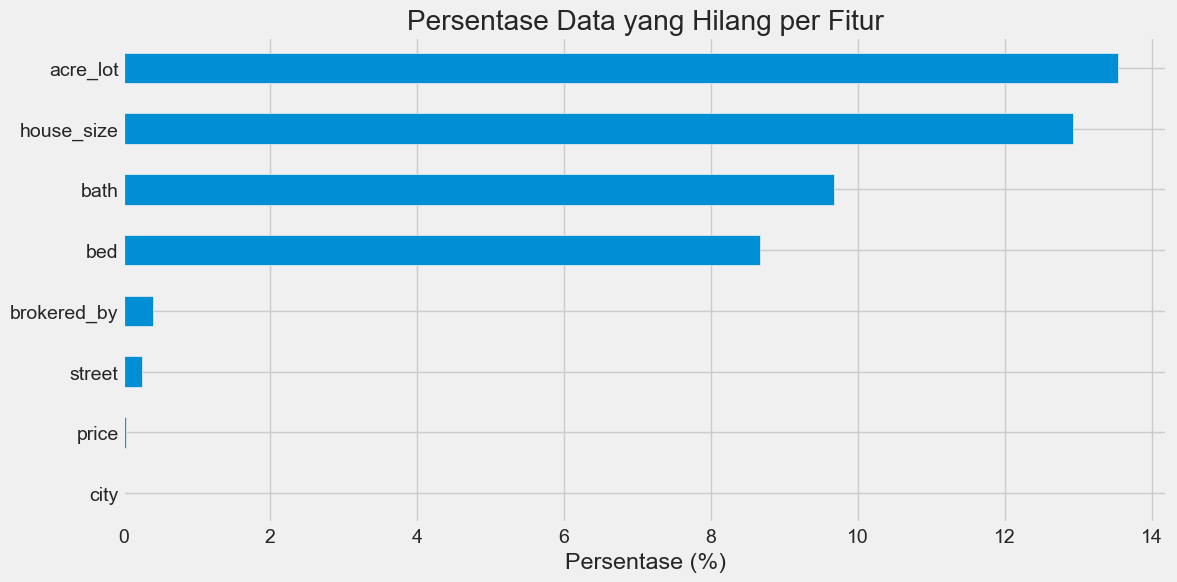

In [16]:
# hitung persentase nilai null yang hilang untuk tiap kolom
missing_percentage = (df_sold.isnull().sum() / len(df_sold)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=True)

# visualisasin ke plot
plt.figure(figsize=figsize)
missing_percentage.plot(kind='barh')
plt.title('Persentase Data yang Hilang per Fitur')
plt.xlabel('Persentase (%)')
plt.show()

In [72]:
# Menghapus kolom 'prev_sold_date' dan kolom lain yang tidak akan kita gunakan
df_processed = df_sold.drop(columns=['status', 'street', 'prev_sold_date'])

# Menghapus baris dengan nilai hilang pada fitur lokasi (persentase sangat kecil)
df_processed.dropna(subset=['city', 'price', 'brokered_by'], inplace=True)

# Imputasi nilai hilang untuk fitur numerik dengan median
for col in ['bed', 'bath', 'house_size', 'acre_lot']:
    median_val = df_processed[col].median()
    df_processed[col] = df_processed[col].fillna(median_val)

# tampilkan status null saat ini
print(f"Dimensi awal data: {df_sold.shape[0]} baris, {df_sold.shape[1]} kolom")
print(f"Dimensi akhir data: {df_processed.shape[0]} baris, {df_processed.shape[1]} kolom")
print("Nilai null per kolom:")
df_processed.isnull().sum()

Dimensi awal data: 36645 baris, 12 kolom
Dimensi akhir data: 36481 baris, 9 kolom
Nilai null per kolom:


brokered_by    0
price          0
bed            0
bath           0
acre_lot       0
city           0
state          0
zip_code       0
house_size     0
dtype: int64

### 3.2. Encoding Categirical Features

*model itu komputasi numerik, kategorikal biasa objek dan tulisan kelas, jadi harus ubah jadi nilai numerik*

kita pake one hot encoding. but ini bagus dan efisien untuk low cardinalitas feature class (sedikit nilai unik). tapi kayak di city misalnya, ini fitur yang penting, tapi terlalu banyak nilai unik, mau di ecode juga kebanyakan. solusinya adalah batasi analisis pada satu negara bagian saja dahulu. kemudian one hot encoding city pada negara itu saja.

*Pendekatan ini adalah penyederhanaan yang disengaja untuk tujuan edukasi. Dalam proyek dunia nyata, teknik yang lebih canggih seperti Target Encoding atau Feature Hashing akan dipertimbangkan untuk menangani fitur lokasi berkardinalitas tinggi.*

In [73]:
df_processed.select_dtypes(include='object').nunique().sort_values(ascending=False)

city     5595
state      50
dtype: int64

In [74]:
# Memfilter data hanya untuk negara bagian New York
df_ny = df_processed[df_processed['state'] == 'New York'].copy()

# Menampilkan bentuk data sebelum dan sesudah filtering
print(f"Ukuran data sebelum filter state: {df_processed.shape}")
print(f"Ukuran data setelah filter state (only New York): {df_ny.shape}")

# Mengidentifikasi kota-kota yang paling umum untuk menghindari terlalu banyak kolom
top_cities_ny = df_ny['city'].value_counts().nlargest(20).index
df_ny['city_encoded'] = df_ny['city'].apply(lambda x: x if x in top_cities_ny else 'Other')

# Melakukan One-Hot Encoding pada fitur 'city_encoded'
df_encoded = pd.get_dummies(df_ny, columns=['city_encoded'], prefix='city')

# Menghapus kolom asli yang tidak diperlukan lagi
df_encoded.drop(columns=[ 'city', 'state', 'zip_code'], inplace=True)

print(f"\nUkuran data setelah One-Hot Encoding: {df_encoded.shape}")
df_encoded.head()

Ukuran data sebelum filter state: (36481, 9)
Ukuran data setelah filter state (only New York): (1493, 9)

Ukuran data setelah One-Hot Encoding: (1493, 27)


,brokered_by,price,bed,bath,acre_lot,house_size,city_Albany,city_Brooklyn,city_Buffalo,city_Cheektowaga,...,city_Poughkeepsie,city_Rochester,city_Saratoga Springs,city_Schenectady,city_Staten Island,city_Syracuse,city_Troy,city_Watertown,city_Webster,city_West Seneca
1486332,65143.0,40000.0,4.0,1.0,0.21,1469.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1488003,61627.0,129900.0,3.0,2.0,0.13,1935.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1482726,15371.0,649000.0,3.0,3.0,1.40,2657.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1479480,45690.0,119000.0,3.0,2.0,0.19,1839.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1485556,45875.0,185000.0,3.0,2.0,0.16,2876.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 3.3. Feature Scaling

*Fitur numerik itu sometimes punya skala variatif yang besar, dan untuk model linear seperti linear regression, gabisa handle ini*.

pas proses gradient decent atau cari koefisien atau weigth atau bobot, tergantung pada seberapa besar nilai fiturnya, jika besar, maka updatenya juga besar, nah masalahnya, misal di kolom house size yang range nya ribuan dan bed yang range nya satuan, maka update akan di dominasi oleh house size, akhirnya model akan lama konvergensi (gradient explotion / vanishing).

solusinya adalah menggunakan transormasi logaritmik atau menyesuaikan distribusi pada range tertentu yang setara untuk semua kolom.

Note: feature scaling harus dilakukan setelah pemisahan data menjadi set trainign dan testing, agar pola tidak test tidak ter leaking oleh fungsi scaler nya,.

In [75]:
# Sebelum scaling, kita harus melakukan log transform pada target variabel 'price'
# untuk mengatasi masalah kemiringan (skewness) yang kita temukan di EDA.
# Kita tambahkan konstanta kecil (1) untuk menghindari log(0).
df_encoded['price_log'] = np.log1p(df_encoded['price'])
X = df_encoded.drop(columns=['price', 'price_log'])
y = df_encoded['price_log']

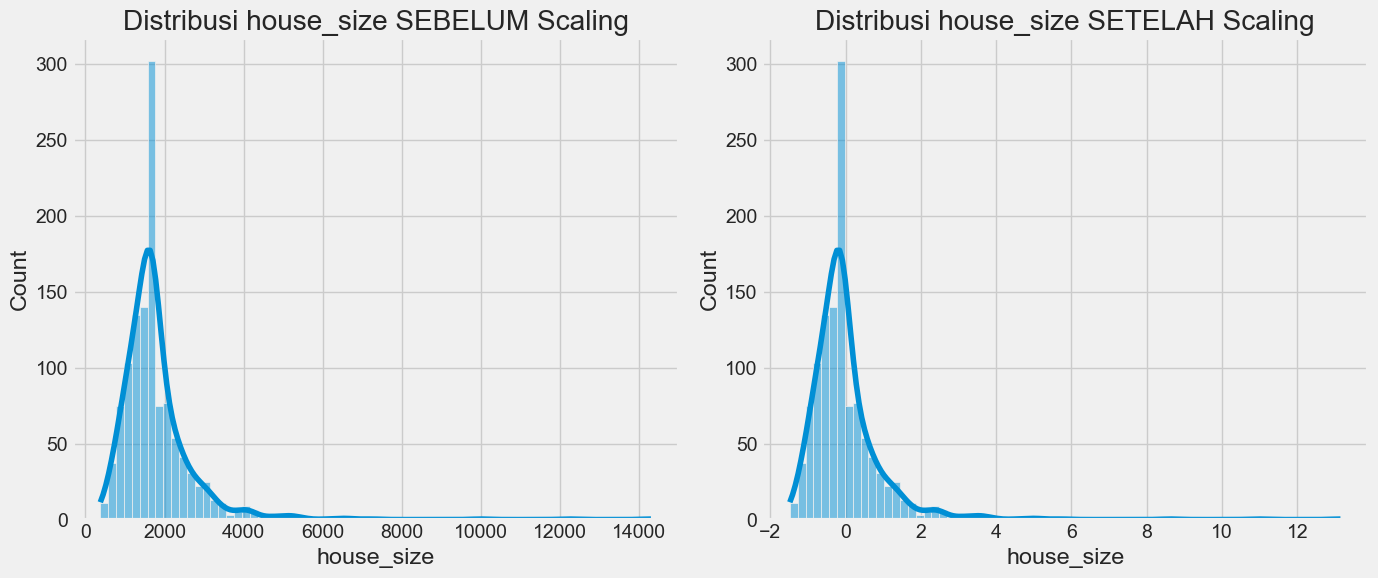

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Memisahkan data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengidentifikasi fitur numerik yang perlu di-scale
numerical_features = ['bed', 'bath', 'house_size', 'acre_lot']

# Membuat instance scaler dan melatihnya HANYA pada data training
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
# Menggunakan scaler yang sama untuk mentransformasi data testing
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

# Visualisasi efek scaling pada fitur 'house_size'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(X_train['house_size'], kde=True)
plt.title('Distribusi house_size SEBELUM Scaling')

plt.subplot(1, 2, 2)
sns.histplot(X_train_scaled['house_size'], kde=True)
plt.title('Distribusi house_size SETELAH Scaling')

plt.tight_layout()
plt.show()

**Analisis :**

sebelum scaling, house_size, masih dalam satuan ribuan ms, dengan sebaran right skewed, rata rata jauh dari nol. rentang besar, over all distribusi ga simetris.

setelah scaling, distribusi bentuknya sama, tapi rentang dan persebaran nilai berpusat di 0, dan rentang berada di antara -2 - 2 

---

## Section 4 : Feature Engeneering and Selection

*data bersih sudah cukup bagus, tapi kita bisa tingkating dengan merekayasa fitur baru yang bisa lebih on point dan informatif*.

proses feature engeneering sebenarnya hanya menggunakan logika persamaan untuk mendapatkan informasi baru yang lebih relevan, misal kita punya data tanggal terakhir, kita bisa buat fitur baru berupa age, yang lebih relevan untuk analisis.

### 4.1. Feature Engeneering

ada tiga fitur utama yang bisa dibuat lagi. dasarnya adalah value proporsition, kenyamanan, dan fungsionalitas properti.

`price_per_sqft` -> ini akan memberikan harga per ukuran yang lebih rinci dan detail, tapi karena langsung berhadapan dengan price, model akan bisa tahu (data leaked) harga nay langsung.

`size_per_bed` -> informasi luas rumah per kamar tidur, bisa aja dua rumah dengan ukuran yang smaa, memiliki jumlah bed yang berbeda, yang menandakan seberapa padat atau lapang kamar pada rumah tersebut.

`total_rooms` -> informasi jumlah ruangan per rumah, menandakan seberapa banyak fasilitas pada satu rumah.

In [77]:
# Membuat fitur baru: rasio luas bangunan terhadap jumlah kamar tidur
# Menambahkan konstanta kecil untuk menghindari pembagian dengan nol
X_train_scaled['size_per_bed'] = X_train_scaled['house_size'] / (X_train_scaled['bed'] + 1e-6)
X_test_scaled['size_per_bed'] = X_test_scaled['house_size'] / (X_test_scaled['bed'] + 1e-6)

# Membuat fitur baru: jumlah total kamar
X_train_scaled['total_rooms'] = X_train_scaled['bed'] + X_train_scaled['bath']
X_test_scaled['total_rooms'] = X_test_scaled['bed'] + X_test_scaled['bath']

print("Data training setelah Feature Engeneering:")
X_train_scaled[['house_size', 'bed', 'size_per_bed', 'total_rooms']].head()

Data training setelah Feature Engeneering:


,house_size,bed,size_per_bed,total_rooms
1482165,0.193065,-0.123392,-1.564655,0.735053
1489923,2.599428,-0.123392,-21.066571,-0.251457
1476107,-0.115875,-0.123392,0.939084,-0.251457
1489512,-0.566674,-0.123392,4.592500,-1.237966
1475825,-0.115875,3.753718,-0.030869,5.598673


### 4.2. Feature Selection

*overfitting adalah saat terlalu banyak fitur, yang tidak relevan yang digunakan*

*masalah lainnnya adalah multikolinearitas, dimana beberapa fiutr punya korelasi yang sangat tinggi, yang bikin model bingun, mana yang paling berkontribusi dan harus difokusin untuk nentuin nilai koefisien*.

untuk membantu mengetahui Feature Seleciton kita akan pake dua pendekatan :

**Corelation Analysis :** untuk identifikasi dan menghilangkan fitur redundan (terlalu mirip), pake heatmap

**Model Based Importance :** Pake model kayak Random Forest untuk kasih rangking tiap fitur.


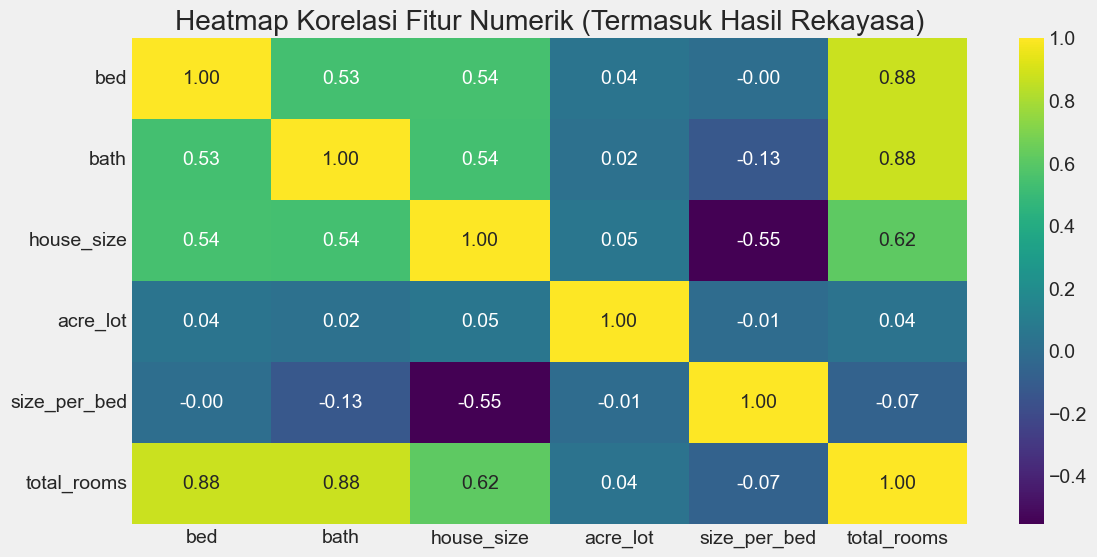

In [78]:
# 1. Analisis Korelasi pada fitur numerik hasil rekayasa
plt.figure(figsize=figsize)
corr_matrix_eng = X_train_scaled[['bed', 'bath', 'house_size', 'acre_lot', 'size_per_bed', 'total_rooms']].corr()
sns.heatmap(corr_matrix_eng, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik (Termasuk Hasil Rekayasa)')
plt.show()

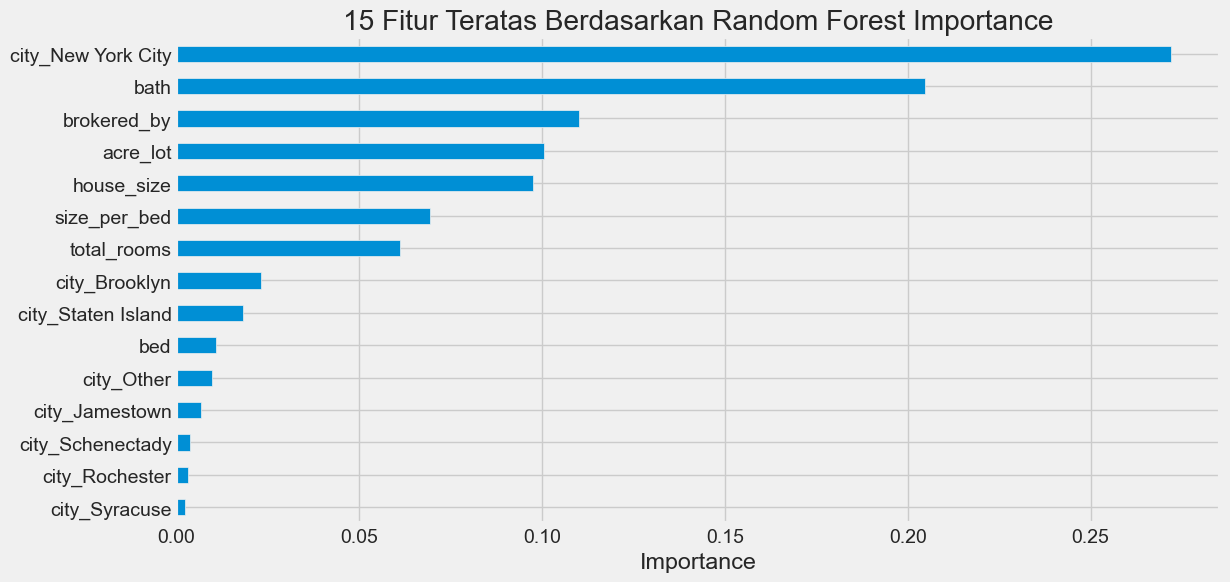

In [79]:
# 2. Model-based Importance menggunakan Random Forest
from sklearn.ensemble import RandomForestRegressor

# Latih model Random Forest sederhana
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

# Dapatkan dan visualisasikan feature importances
importances = pd.Series(rf.feature_importances_, index=X_train_scaled.columns)
top_importances = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=figsize)
top_importances.sort_values(ascending=True).plot(kind='barh')
plt.title('15 Fitur Teratas Berdasarkan Random Forest Importance')
plt.xlabel('Importance')
plt.show()

**Analisis :**

**Dari Heatmap Korelasi :** Kita melihat korelasi yang sangat tinggi antara `total_rooms` dan `bed` (0.88) serta `total_rooms` dan `bath` (0.88). Ini adalah contoh multikolinearitas. Karena `total_rooms` adalah kombinasi linear dari keduanya, menyertakan ketiganya akan menjadi sangat redundan. Kita juga melihat korelasi tinggi antara `house_size` dan `total_rooms` (0.62).

**Dari Grafik Feature Importance :** Fitur paling penting dalam prediksi harga rumah adalah lokasi (`city_New York City`) dan jumlah kamar mandi (`bath`). Fitur `house_size` dan `acre_lot` juga berperan penting, menunjukkan bahwa ukuran properti memengaruhi harga. Fitur rekayasa seperti `total_rooms` dan `size_per_bed` terbukti memberikan kontribusi besar.

**Strategi Feature Selection :**

Berdasarkan feature importance, kita merancang strategi seleksi fitur sebagai berikut:
- Pertahankan house_size dan acre_lot, karena keduanya termasuk fitur penting menurut Random Forest.-

- Gabungkan bed dan bath menjadi total_rooms untuk mengurangi multikolinearitas.

- Pilih 3–5 kota teratas berdasarkan importance untuk menjaga model tetap sederhana.

Pendekatan ini menggabungkan analisis korelasi (untuk menghindari redundansi) dan feature importance (untuk menjaga kekuatan prediksi). Ini menciptakan model linear yang tidak hanya cukup akurat, tapi juga mudah dijelaskan kepada pemangku kepentingan.



In [87]:
# Memilih fitur final berdasarkan analisis
selected_features = [
    'house_size',
    'acre_lot',
    'total_rooms',
    # Menambahkan fitur kota teratas dari importance plot
]
# Ambil nama 5 kota teratas dari `top_importances`
top_city_features = top_importances[top_importances.index.str.startswith('city_')].head(5).index.tolist()
final_features = ['house_size', 'acre_lot', 'total_rooms'] + top_city_features

X_train_final = X_train_scaled[final_features]
X_test_final = X_test_scaled[final_features]

print("Fitur yang terpilih untuk model final:")
print(X_train_final.columns.tolist())
print(f"\nBentuk data fitur Independent training final: {X_train_final.shape}")
print(f"Bentuk data target Dependent training final: {y_train.shape}\n")

X_train_final.head()

Fitur yang terpilih untuk model final:
['house_size', 'acre_lot', 'total_rooms', 'city_New York City', 'city_Brooklyn', 'city_Staten Island', 'city_Other', 'city_Jamestown']

Bentuk data fitur Independent training final: (1194, 8)
Bentuk data target Dependent training final: (1194,)



,house_size,acre_lot,total_rooms,city_New York City,city_Brooklyn,city_Staten Island,city_Other,city_Jamestown
1482165,0.193065,-0.057911,0.735053,False,False,False,True,False
1489923,2.599428,-0.058095,-0.251457,False,False,False,False,False
1476107,-0.115875,-0.058086,-0.251457,False,False,False,True,False
1489512,-0.566674,-0.058091,-1.237966,False,False,False,True,False
1475825,-0.115875,-0.058118,5.598673,False,False,False,True,False


Sekarang data kita cuma punya 1 k baris dan 8 fitur untuk prediksi (training), dikitt, tapi ini adalah keseimbangan antara kekuatan prediksi dan interpretasi—sebuah model dengan 8 fitur yang dapat dijelaskan sering kali lebih berharga bagi bisnis daripada model dengan 50 fitur yang merupakan "kotak hitam".

Sekarang data sudah cukup bagus untuk training, Kenapa??

| Komponen                  | Status | Keterangan |
|---------------------------|--------|-------------|
| Fitur numerik diskalakan | ✅     | Nilai float, terlihat sudah melalui standard scaling |
| Fitur kategorikal (kota) | ✅     | Sudah diubah menjadi one-hot encoded (Boolean) |
| Nilai kosong (missing)   | ✅     | Tidak terlihat ada nilai NaN |
| Target (`y_train`)       | ✅    |  Sudah tersedia dan sejajar dengan `X_train_final` |
| Jumlah fitur dan baris   | ✅     | (1194, 8) — cukup untuk model linear |
| Multikolinearitas        | ✅     | Sudah ditangani dengan merangkum `bed + bath` menjadi `total_rooms` |

---

## Section 5 : Prediction Model from Scratch

disini kita bakal buat model regresi linear dari awal, pake dua metode : normal equation dan gradient decent.

### 5.1. Linear Regression from Scratch

#### Normal Equation 

solusi dari optimasi regresi linear awal, ga repetitif, langsung hitung nilai theta (bobot) dengan langsung minimalkan cost of Sum of Square Errors (kumpulan beberapa residuals (perbadingan nilai prediksi dan nilai asli)).

Rumus regresi linear:

$θ = (X^TX)^{-1}X^Ty$

Keterangan:
- **$θ$** : Vektor bobot/koefisien yang dicari.
- **$X$** : Matriks fitur (sudah ditambahkan kolom bias/intercept).
- **$y$** : Vektor target (label).
- **$X^T$** : Transpos dari matriks $X$.
- **$(\cdot)^{-1}$** : Invers dari matriks.

Implemantasi python code :


In [104]:
def normal_equation(X, y):
    """Menghitung bobot regresi linear menggunakan Normal Equation."""
    # Menambahkan kolom bias (intercept) ke X
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    # Menghitung theta menggunakan rumus
    try:
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    except np.linalg.LinAlgError:
        print("Matriks singular, tidak dapat di-inverse. Coba gunakan SVD (Pseudo-inverse).")
        theta_best = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        
    return theta_best

# Making sure datanya udah dalam bentuk one hot yang sesuai
X_train_final = X_train_final.astype(float)
y_train = y_train.astype(float)

# Menggunakan Normal Equation pada data training kita
theta_normal_eq = normal_equation(X_train_final, y_train)

# Theta adalah intercept, sisanya adalah koefisien fitur
print(f"Intercept (theta_0): {theta_normal_eq[0]:.4f}\n")
print("Koefisien fitur (theta_1,...):")
for i, coef in enumerate(theta_normal_eq[1:]):
    print(f"{X_train_final.columns[i]}: {coef:.4f}")

Intercept (theta_0): 12.1313

Koefisien fitur (theta_1,...):
house_size: 0.0952
acre_lot: -0.0206
total_rooms: 0.2130
city_New York City: 2.0437
city_Brooklyn: 1.4099
city_Staten Island: 1.2005
city_Other: 0.2810
city_Jamestown: -0.8710


**Analisis :**

Normal equation itu cepet, soalnya ga repetitif dan gapake parameter tuning seperti learning rate. tapi sebenarnya, perhitungan matriks dan inversenya segala macem akan ga efisien jika banyak fitur, karena komptuasinya $O(n^3)$.

#### Gredient Decent

Gradient decent adalah algoritma optimasi secaar repetitif mencari nilai yang tepat untuk koefisien dengan mempertimbangkan m=0 pada SSR.

langkah langkah nya simple, mulai dari bobot acak, lakukan forward propagation, hitung loss, update parameter, lakukan lagi, sampe loss sangat kecil, kalo di gradient decent, m=0.

Fungsi Biaya (MSE):

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)}\right)^2
$$


Rumus Update Gradient Descent:

$$
\theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)}\right) x_j^{(i)}
$$

Implementasi Python Code:

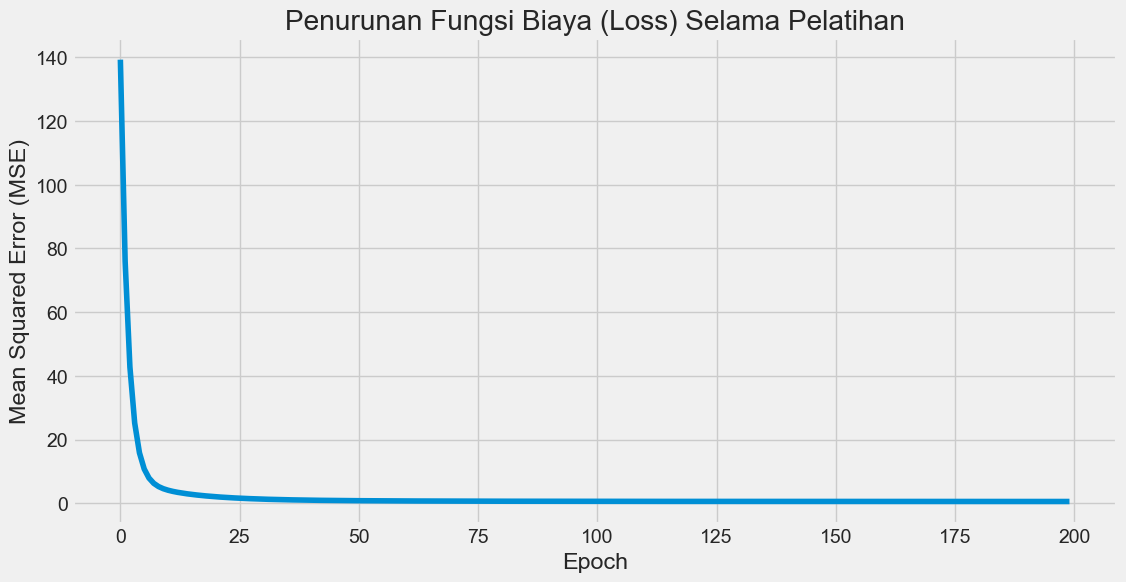

In [110]:
def gradient_descent(X, y, learning_rate=0.01, n_epochs=1000):
    """Menghitung bobot regresi linear menggunakan Gradient Descent."""
    # Menambahkan kolom bias (intercept)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Fix: X.shape[0] bukan X.shape
    m, n = X_b.shape

    # Inisialisasi theta secara acak
    theta = np.random.randn(n, 1)

    # Inisialisasi list untuk menyimpan riwayat cost
    cost_history = []

    for epoch in range(n_epochs):
        # Hitung prediksi
        predictions = X_b.dot(theta)

        # Hitung error
        errors = predictions - y.values.reshape(-1, 1)

        # Hitung gradien
        gradients = (2/m) * X_b.T.dot(errors)

        # Update theta
        theta = theta - learning_rate * gradients

        # Hitung dan simpan cost (MSE)
        cost = np.mean(errors ** 2)
        cost_history.append(cost)

    return theta, cost_history

# Hyperparameter
learning_rate = 0.1
n_epochs = 200

# Jalankan training
theta_gd, cost_history = gradient_descent(X_train_final, y_train, learning_rate, n_epochs)

# Visualisasi loss
plt.figure(figsize=figsize)
plt.plot(range(n_epochs), cost_history)
plt.title('Penurunan Fungsi Biaya (Loss) Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [112]:
# Tampilkan hasil
print(f"Intercept (theta_0): {theta_gd[0][0]:.4f}")
print("Koefisien fitur (theta_1, ...):")
for i, coef in enumerate(theta_gd[1:]):
    print(f"  - {X_train_final.columns[i]}: {coef[0]:.4f}")

Intercept (theta_0): 12.0863
Koefisien fitur (theta_1, ...):
  - house_size: 0.0939
  - acre_lot: -0.0208
  - total_rooms: 0.2185
  - city_New York City: 2.1495
  - city_Brooklyn: 1.4135
  - city_Staten Island: 0.7855
  - city_Other: 0.3325
  - city_Jamestown: 0.0790


**Analisis :**

learnign curve : grafik epoch vs MSE itu adalah bukti visual bahwa model belajar dengan baik. 

pesa

### 5.2. Validation and Compare Models with Scikit-Learn

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Melatih model Scikit-learn
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(X_train_final, y_train)

# Fungsi evaluasi model dengan parameter theta (Normal Eq / GD)
def evaluate_model(theta, X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    y_pred = X_b.dot(theta)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    return mae, rmse, r2

# Evaluasi
mae_ne, rmse_ne, r2_ne = evaluate_model(theta_normal_eq, X_test_final, y_test)
mae_gd, rmse_gd, r2_gd = evaluate_model(theta_gd, X_test_final, y_test)

y_pred_sklearn = lin_reg_sklearn.predict(X_test_final)
mae_sk = mean_absolute_error(y_test, y_pred_sklearn)
rmse_sk = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))
r2_sk = r2_score(y_test, y_pred_sklearn)

# Ubah theta ke array 1D jika perlu
theta_ne_flat = np.ravel(theta_normal_eq)
theta_gd_flat = np.ravel(theta_gd)

comparison_data = {
    "Model": ["Normal Equation", "Gradient Descent", "Scikit-learn"],
    "Intercept": [theta_ne_flat[0], theta_gd_flat[0], lin_reg_sklearn.intercept_],
    "Koefisien 'house_size'": [theta_ne_flat[1], theta_gd_flat[1], lin_reg_sklearn.coef_[0]],
    "MAE": [mae_ne, mae_gd, mae_sk],
    "RMSE": [rmse_ne, rmse_gd, rmse_sk],
    "R²": [r2_ne, r2_gd, r2_sk]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df.round(4)

,Model,Intercept,Koefisien 'house_size',MAE,RMSE,R²
0,Normal Equation,12.1313,0.0952,0.5399,0.7398,0.4802
1,Gradient Descent,12.0863,0.0939,0.5443,0.7412,0.4782
2,Scikit-learn,12.1313,0.0952,0.5399,0.7398,0.4802


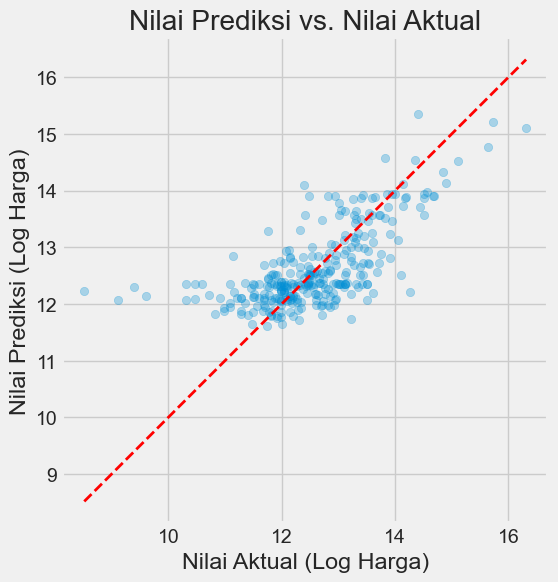

In [129]:
# Membuat plot Prediksi vs Aktual
plt.figure(figsize=figsize)
plt.scatter(y_test, y_pred_sklearn, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Nilai Prediksi vs. Nilai Aktual')
plt.xlabel('Nilai Aktual (Log Harga)')
plt.ylabel('Nilai Prediksi (Log Harga)')
plt.axis('equal')
plt.axis('square')
plt.show()

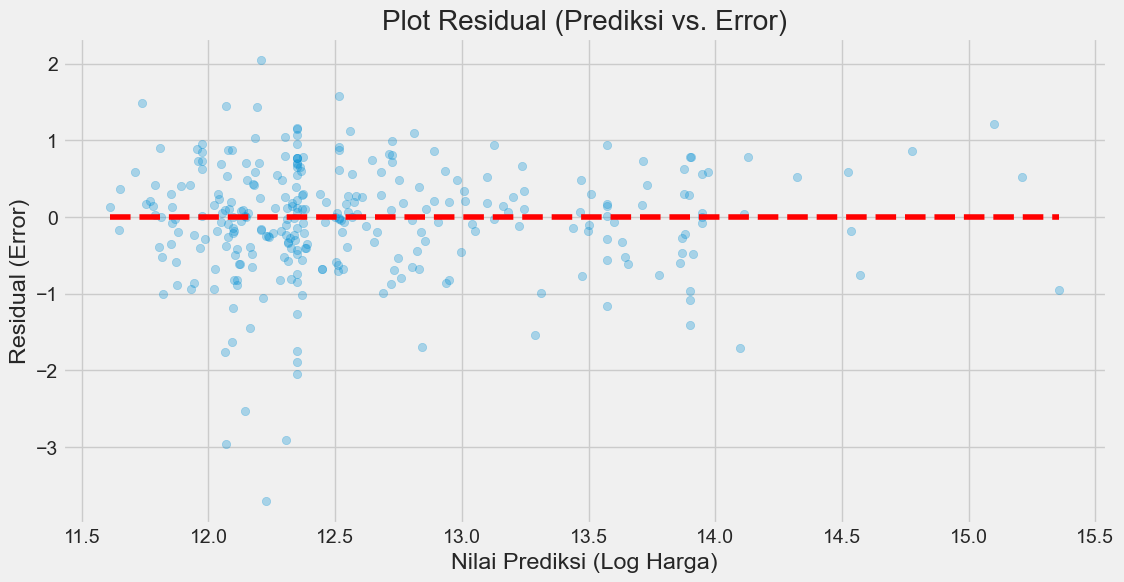

In [130]:
# Menghitung residual
residuals = y_test - y_pred_sklearn

# Membuat plot Residual
plt.figure(figsize=figsize)
plt.scatter(y_pred_sklearn, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_sklearn.min(), xmax=y_pred_sklearn.max(), colors='red', linestyles='--')
plt.title('Plot Residual (Prediksi vs. Error)')
plt.xlabel('Nilai Prediksi (Log Harga)')
plt.ylabel('Residual (Error)')
plt.show()